# Heart Disease Prediction
##### _Notebook 2 of 2 of the End-to-end ML Workflow_

This heart disease dataset is a public health dataset that can be retrieved from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Content
Attribute information:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
*The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.*

## 5. Modelling
_What kind of model should we use? How to use a model?_

### 5.1 From CSV to Model

In [33]:
#1. Importing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score
import seaborn as sbn  
heart_disease = pd.read_csv("data/heart-disease-preprocessed.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
280,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
281,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
282,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
# Describing the data
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,53.992958,0.700704,0.989437,129.911972,242.077465,0.140845,0.524648,150.042254,0.316901,0.948592,1.429577,0.637324,2.309859,0.559859
std,9.161678,0.458758,1.031258,15.368133,44.753834,0.348476,0.514206,22.692716,0.466090,1.026141,0.599150,0.904727,0.578570,0.497280
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


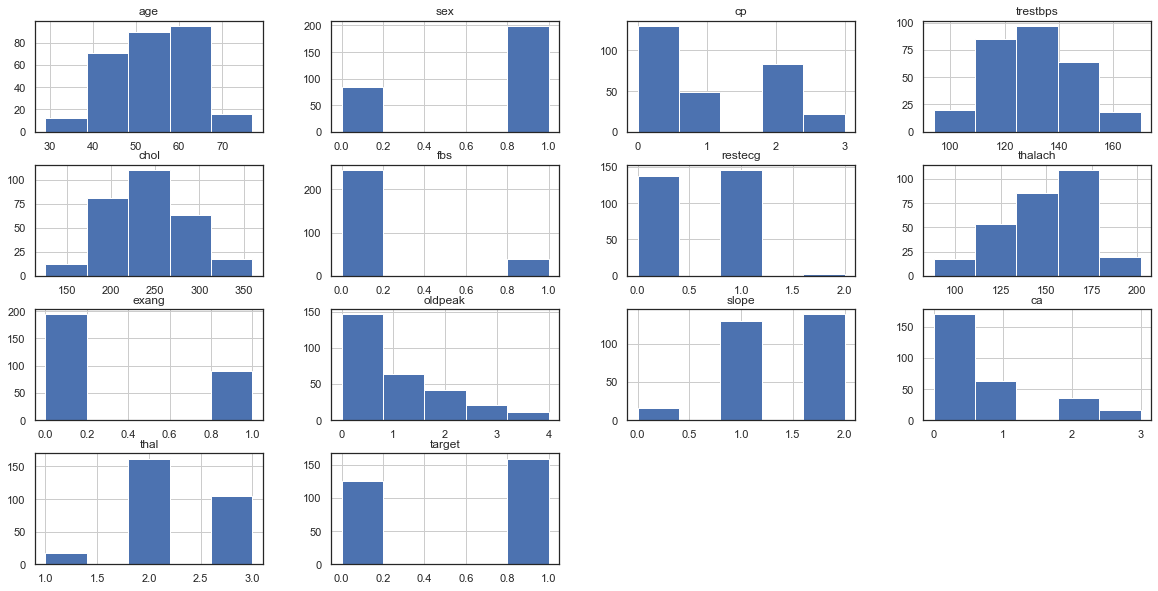

In [35]:
heart_disease.hist(bins=5, figsize=(20, 10));

In [36]:
# 2. Create features matrix and labels
# Create X (features matrix)
X = heart_disease.drop("target", axis = 1)

# Create y (labels)
y = heart_disease["target"]

In [40]:
# 3. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [53]:
# 4. Split data into training and testing
from sklearn.model_selection import train_test_split
np.random.seed(23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
# 5. Fit the model
clf.fit(X_train, y_train);

In [55]:
# 6. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [56]:
clf.score(X_test, y_test)

0.8947368421052632

### 5.2 Choosing the Right Estimator
Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
Different estimators are better suited for different types of data and different problems.
![title](https://scikit-learn.org/stable/_static/ml_map.png)

#### 5.2.1 Linear SVC

In [62]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC(C = 1, max_iter = 100000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\user\Documents\GitHub\ml-training\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7543859649122807

In [11]:
clf.get_params()

{'C': 0.5,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 10000000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

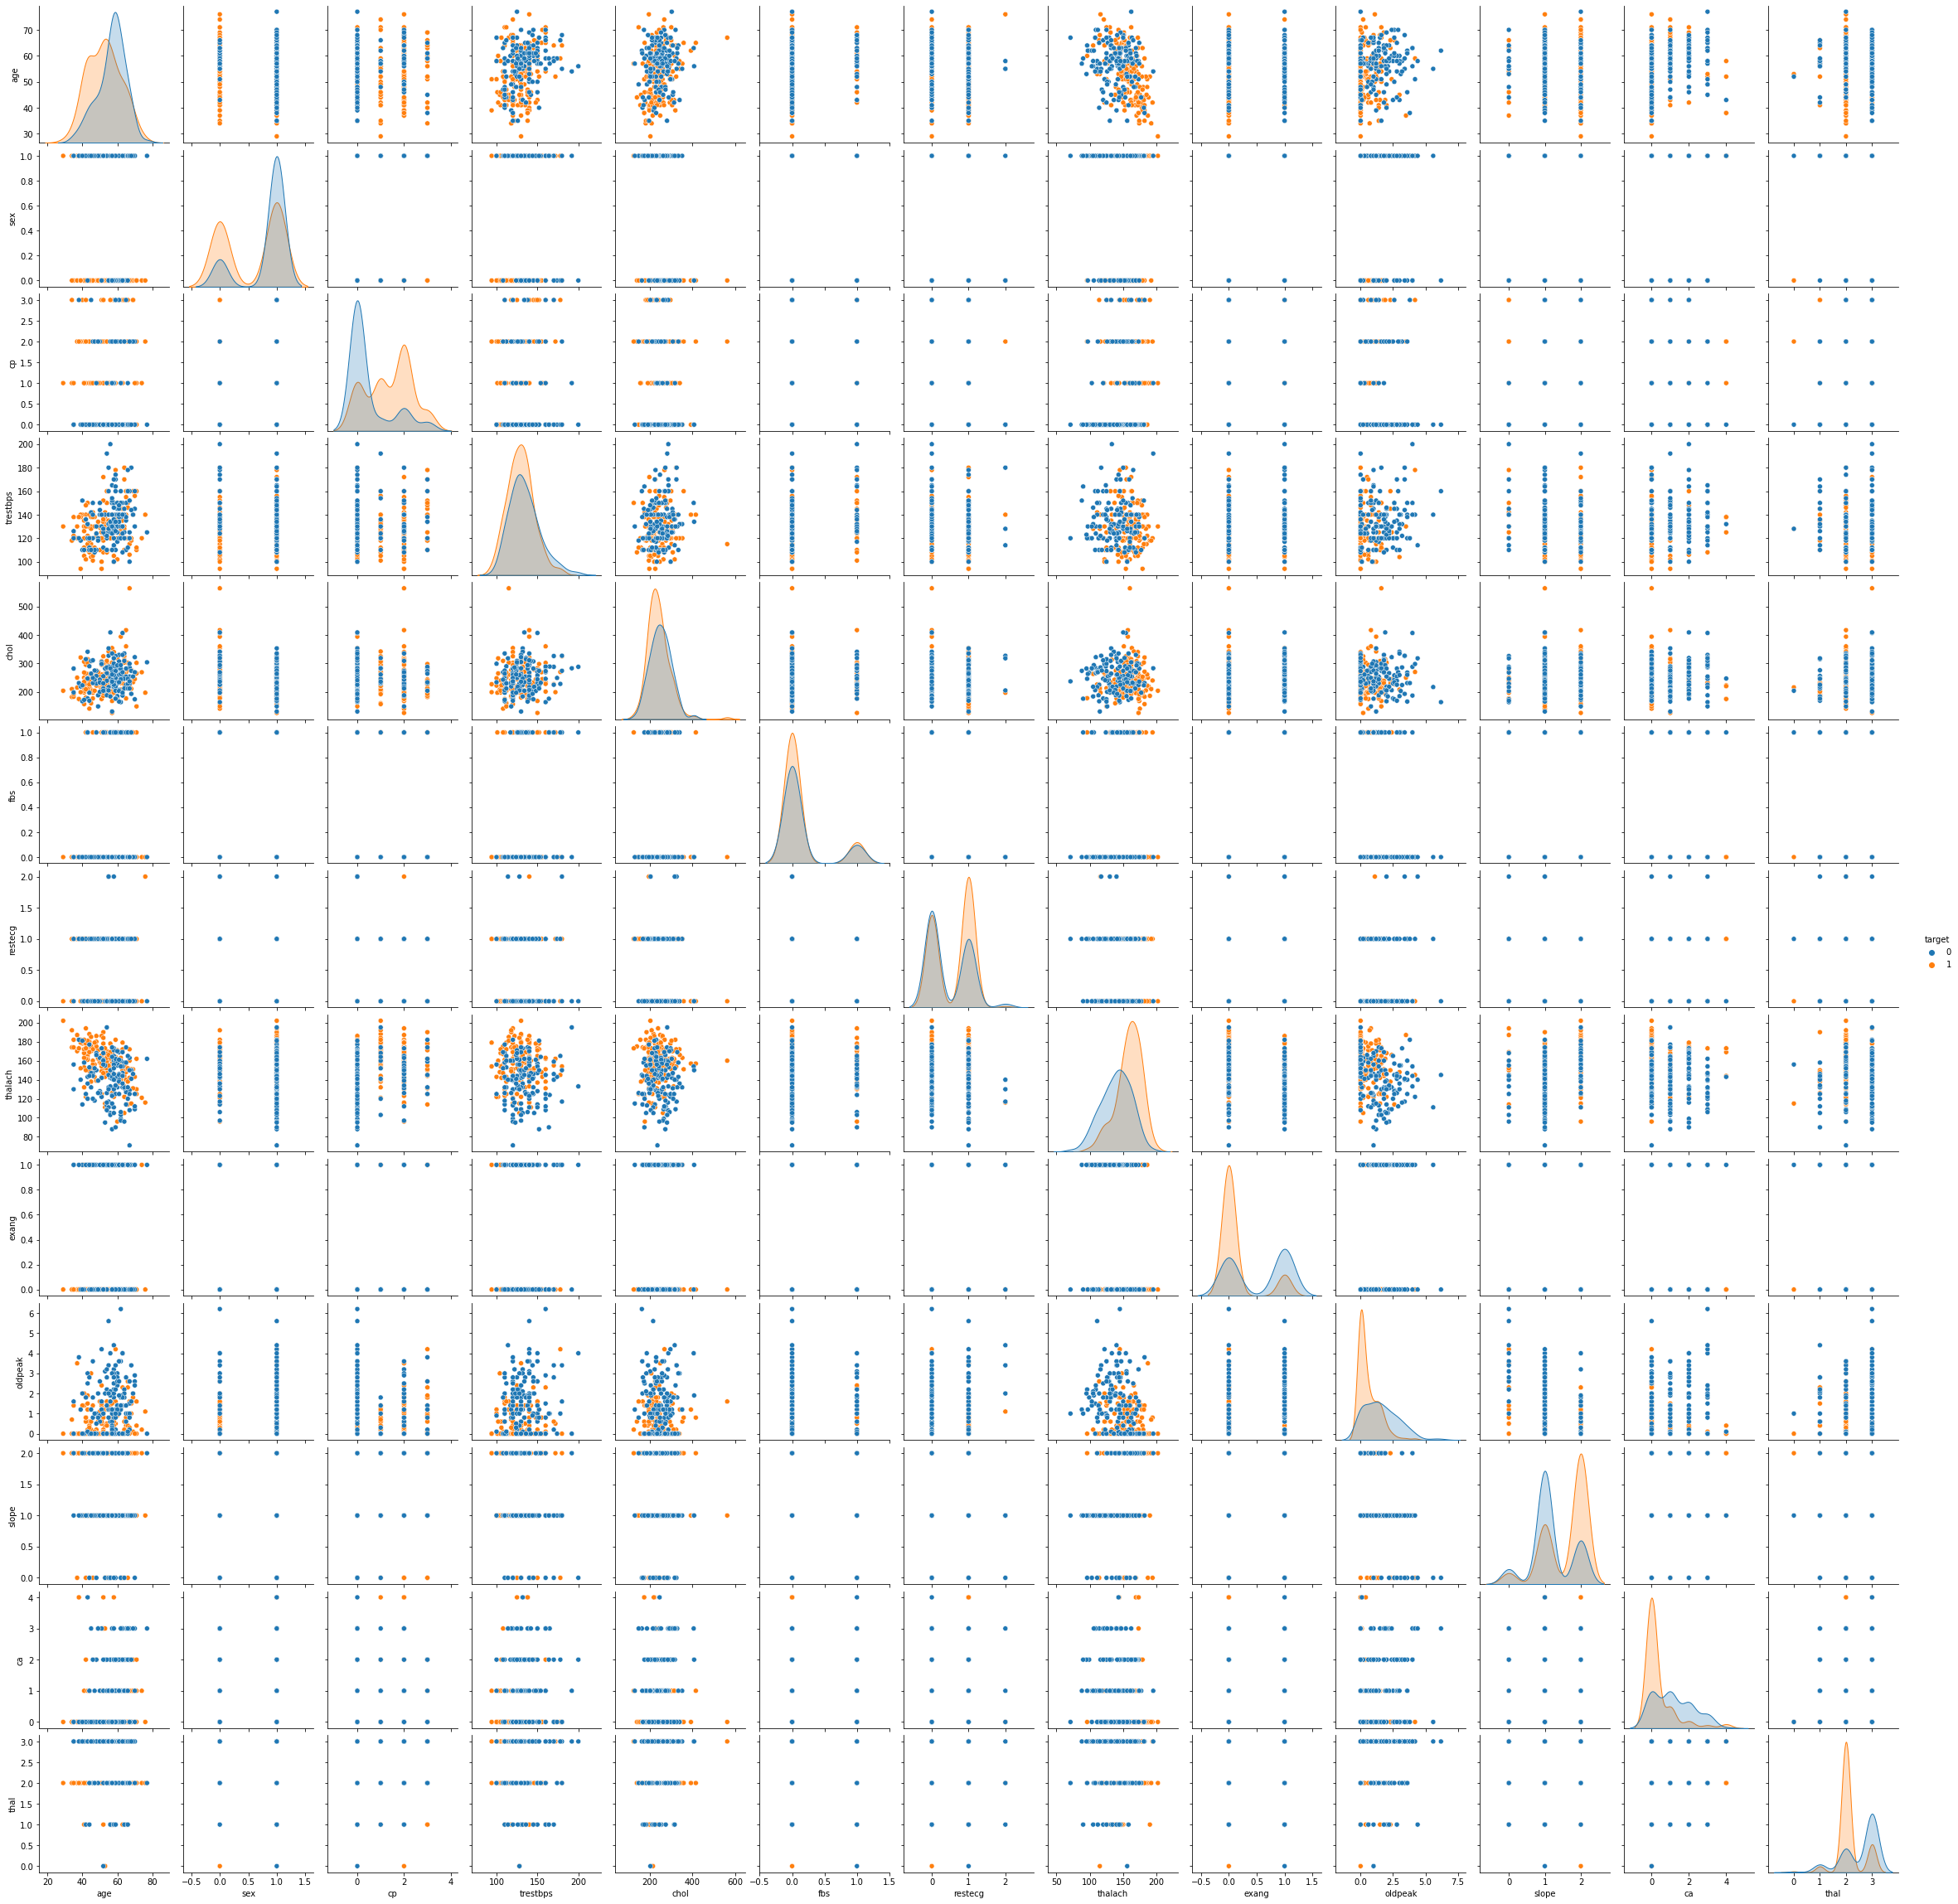

In [12]:
sbn.pairplot(heart_disease, hue='target')
plt.show()

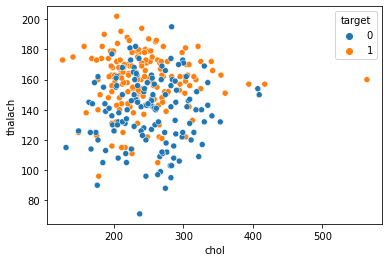

In [13]:
sbn.scatterplot(data=heart_disease, x = "chol", y="thalach", hue = "target")
plt.show()

In [14]:
X = heart_disease[["trestbps","thalach", "chol"]].copy()
Y= np.array(heart_disease["target"])

# Sensitivity to feature scales so let us transform our columns
X.trestbps = (X.trestbps - np.mean(X.trestbps))/np.std(X.trestbps)
X.chol = (X.chol - np.mean(X.chol))/np.std(X.chol)
X.thalach = (X.thalach - np.mean(X.thalach))/np.std(X.thalach)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

model = LinearSVC(C = 1, max_iter = 10000000)
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6065573770491803

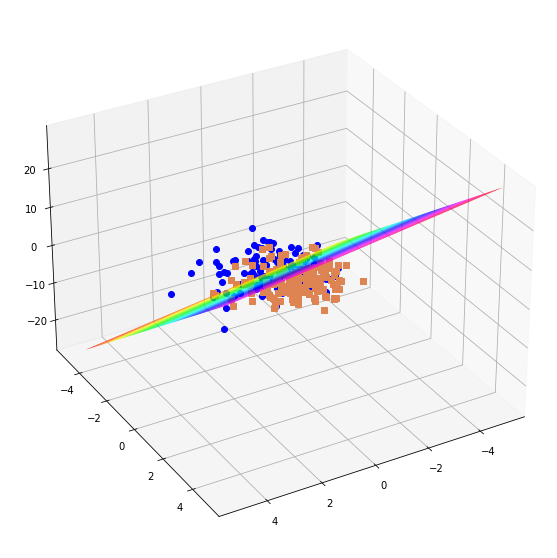

In [15]:
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(12,10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'s', color="#DD8452")
ax.plot_surface(x, y, z(x,y), cmap = 'hsv')
ax.view_init(30, 60)
plt.show()

The Linear SVM produced an accuracy of 79.51% and we can optimize our features or modify hyperparamters but let us try and look at the sci-kit learn estimator chart. 

#### 5.2.2 Naive Bayes

In [16]:
# Import the LinearSVC estimator class
from sklearn.naive_bayes import GaussianNB

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model to the data (training the machine learning model)
gnb.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
gnb.score(X_test, y_test)

0.8688524590163934

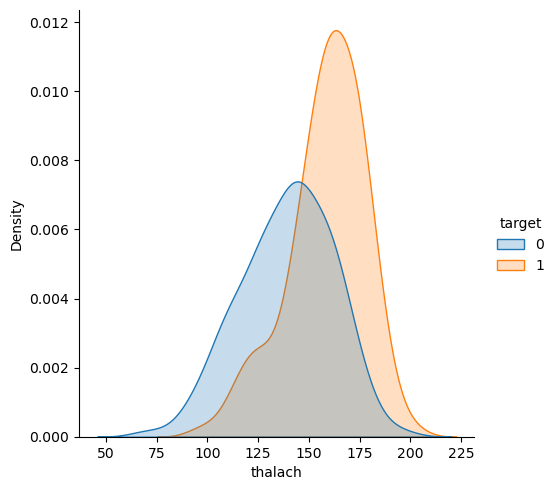

In [17]:
p = sbn.displot(heart_disease, x="thalach", hue="target", kind="kde", fill=True)
p.fig.set_dpi(100)

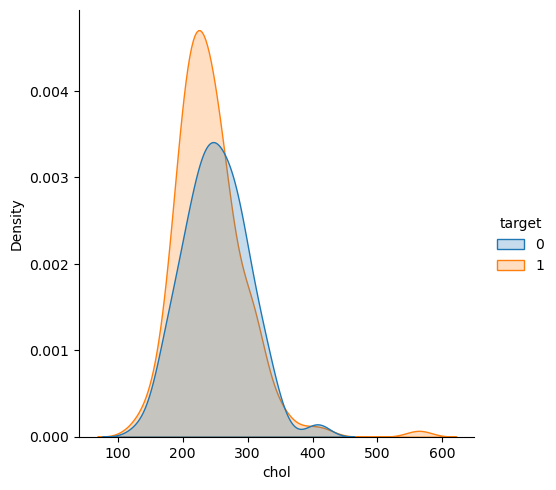

In [18]:
p = sbn.displot(heart_disease, x="chol", hue="target", kind="kde", fill=True)
p.fig.set_dpi(100)

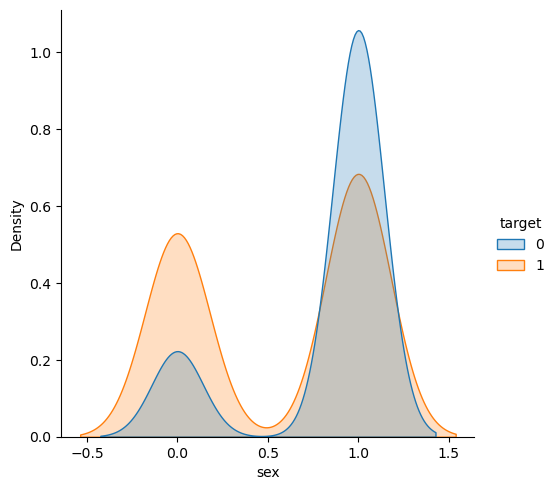

In [19]:
p = sbn.displot(heart_disease, x="sex", hue="target", kind="kde", fill=True)
p.fig.set_dpi(100)

In [20]:
y_preds = gnb.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
y_test = np.array(y_test)
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [22]:
accuracy_score(y_test, y_preds)

0.8688524590163934

Our naive-bayes classification has produced a good accuracy of 80% already but having 20 incorrect heart disease prediction out of 100 patients seems a little bit high, let us try implementing another model.

#### 5.2.3 Random Forest

In [66]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(23)

# Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=144, bootstrap=True, max_samples=0.80)
clf = RandomForestClassifier(n_estimators = 110)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.9122807017543859

Let us try mapping out one of our trees.

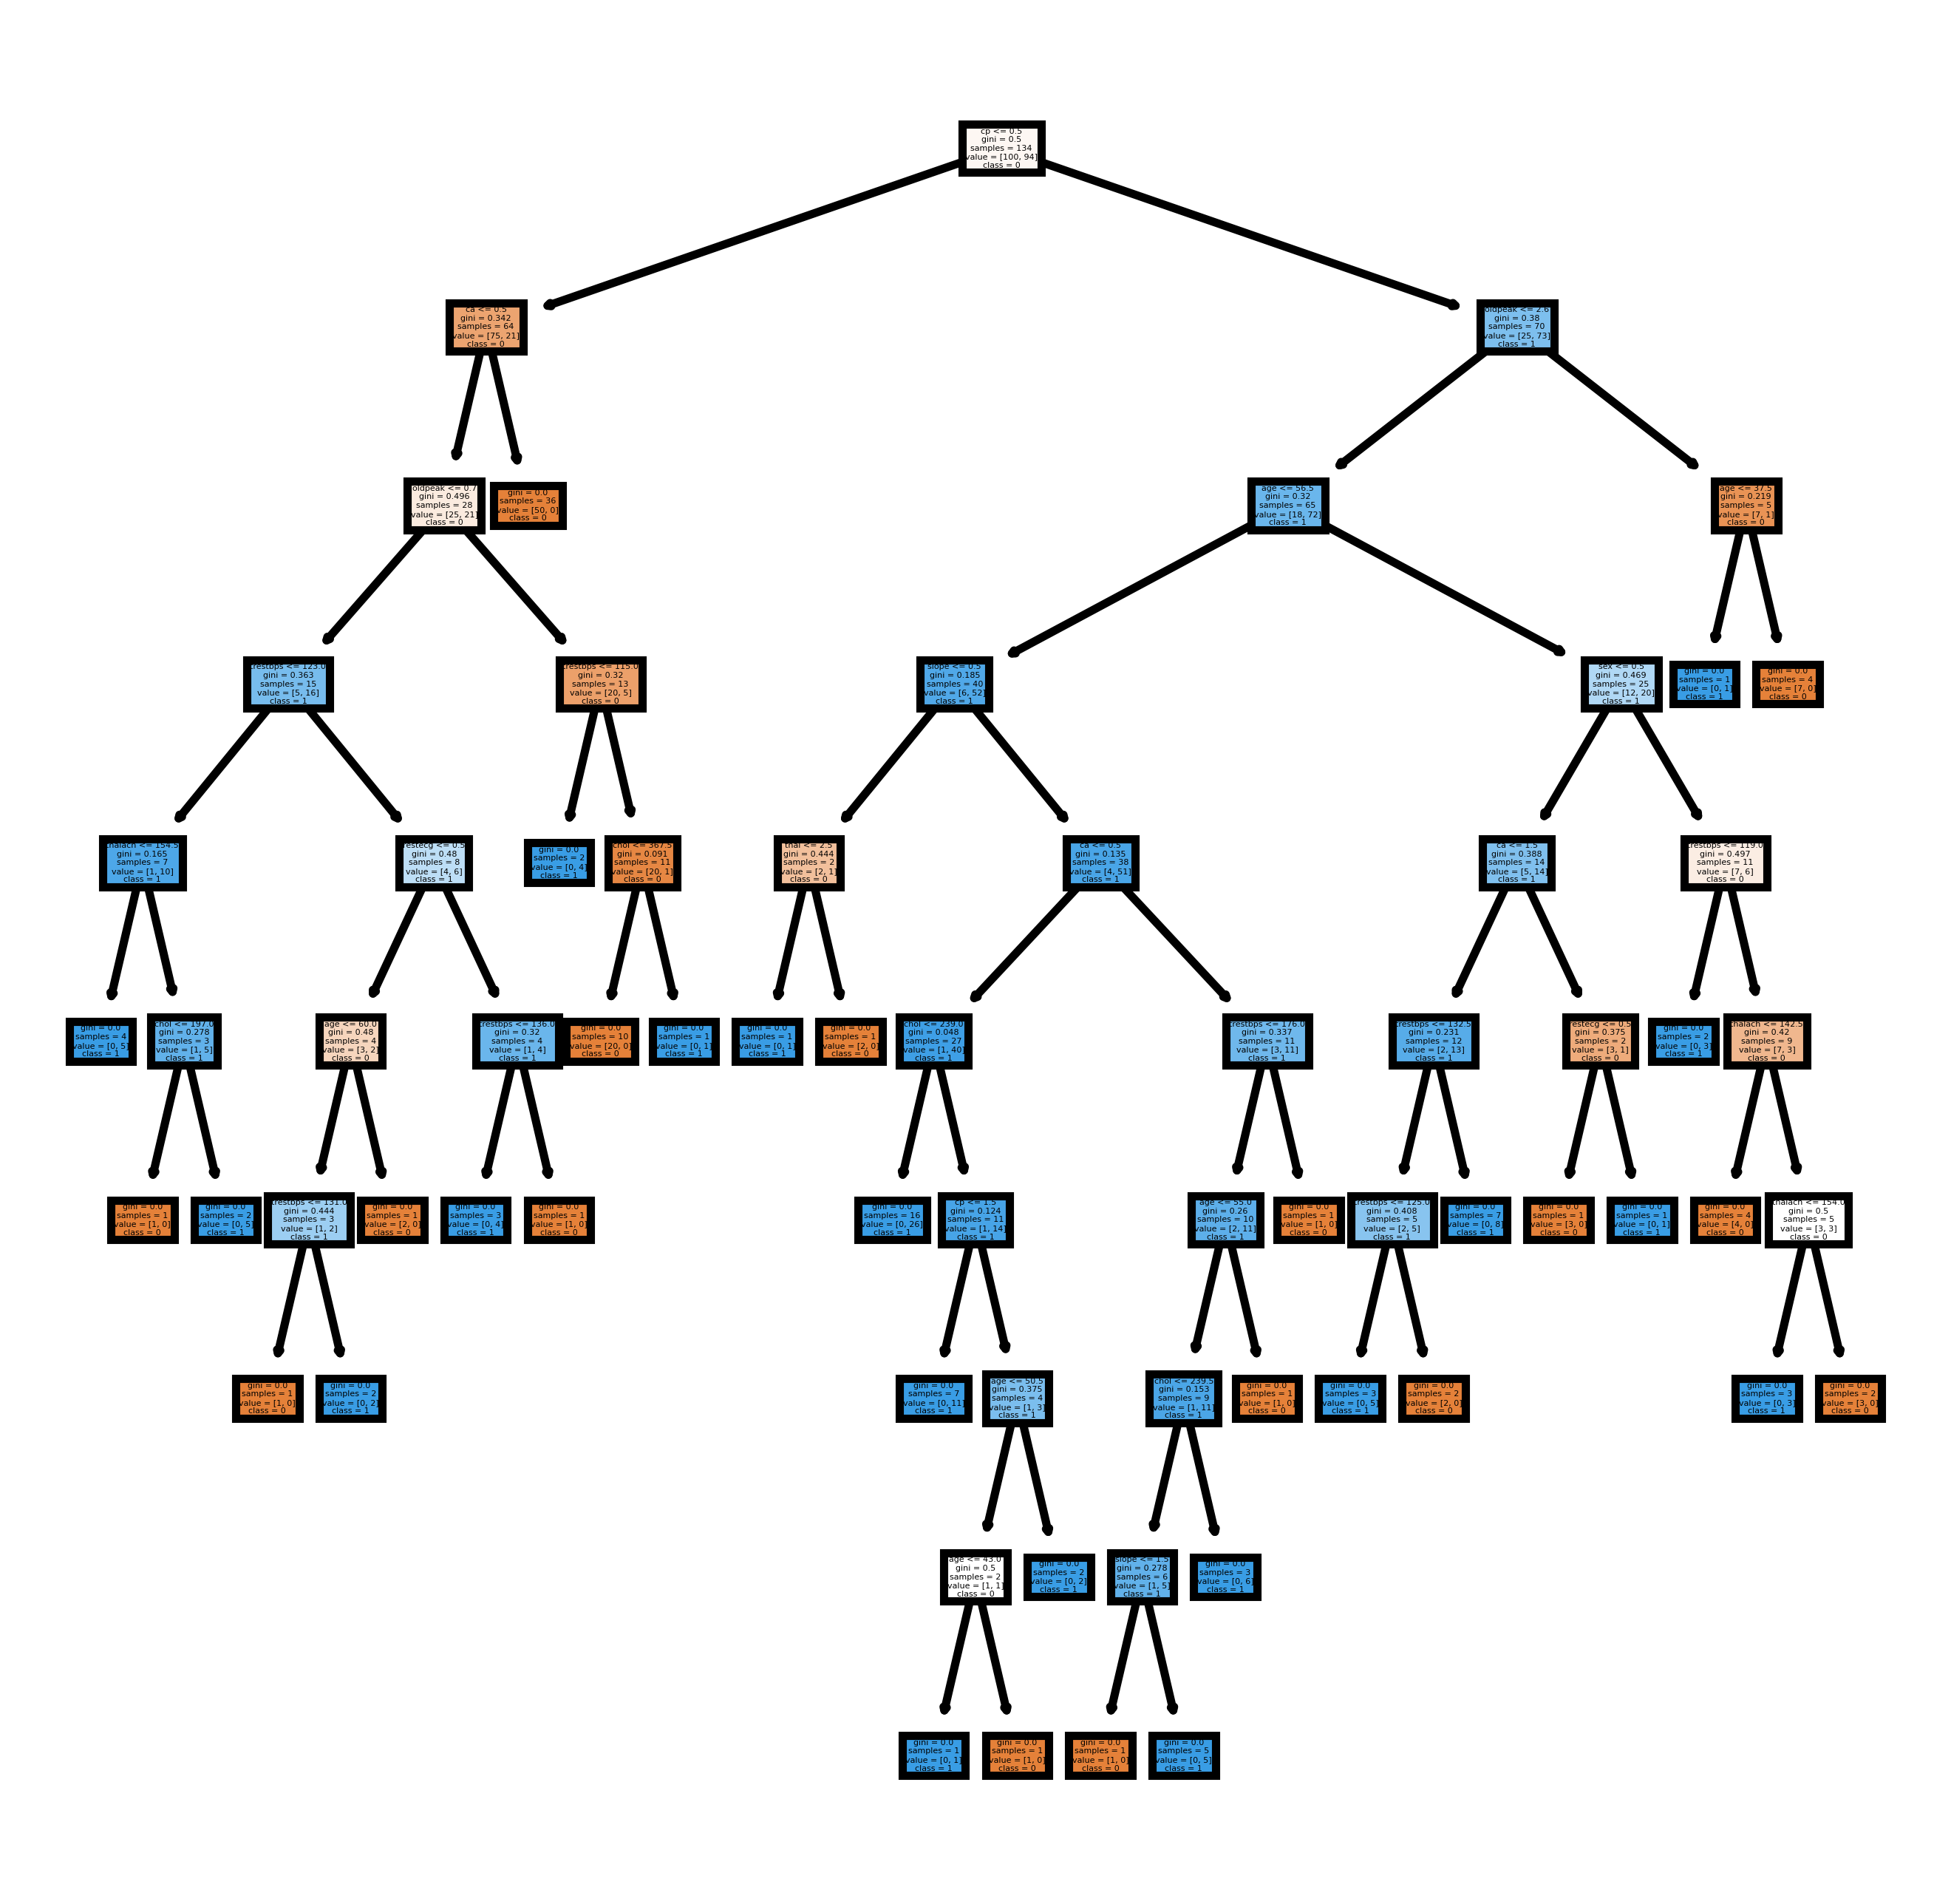

In [24]:
from sklearn import tree
fn=X.columns.values
cn=np.array(['0','1'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[143],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

It seems that our accuracy has improved! Let us settle for this model for now. We can try and export it and use it as our model for deployment.

#### 5.2.4 Bonus: Linear Regression

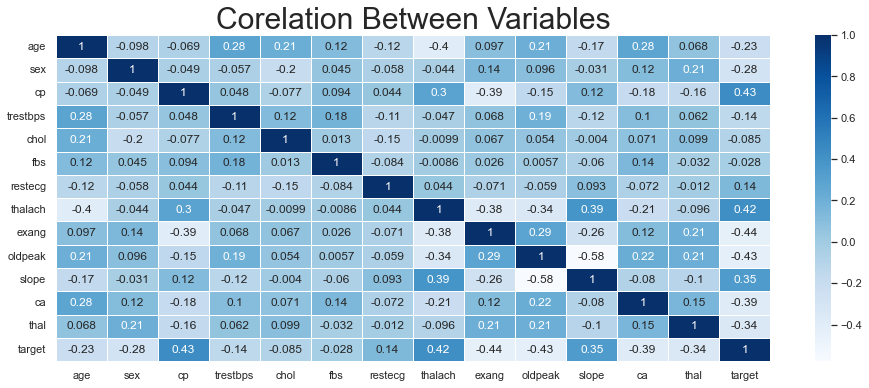

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (16, 6) 
sns.heatmap(heart_disease.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

Mean squared error: 410.07
Coefficient of determination: -0.10


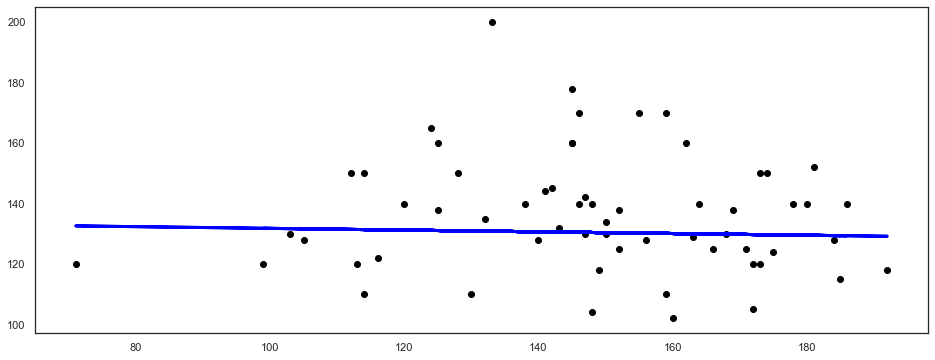

In [26]:
# Import the Linear Regression class
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Setup random seed
np.random.seed(42)

# Make the data
# X = heart_disease.drop("target", axis = 1)
X = np.array(heart_disease["thalach"]) #Use only one feature
y= np.array(heart_disease["trestbps"])

X = X.reshape(len(X), 1)

X  

# diabetes_X = diabetes_X[:, np.newaxis, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiate LinearSVC
regr = linear_model.LinearRegression()

# Fit the model to the data (training the machine learning model)
regr.fit(X_train, y_train)


# Evaluate the LinearSVC
# regr.score([X_test], [y_test])
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

# Hyperparameters

There are multiple ways of tuning hyperparameters, in here we'll be showing one of them.

In [67]:
# 5. Improve a model
# Try a different amount of n_estimators
np.random.seed(23)
for i in range(10, 200, 5):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 87.72%
 
Trying model with 15 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 20 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 25 estimators...
Model accuracy on test set: 89.47%
 
Trying model with 30 estimators...
Model accuracy on test set: 85.96%
 
Trying model with 35 estimators...
Model accuracy on test set: 87.72%
 
Trying model with 40 estimators...
Model accuracy on test set: 87.72%
 
Trying model with 45 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 50 estimators...
Model accuracy on test set: 92.98%
 
Trying model with 55 estimators...
Model accuracy on test set: 85.96%
 
Trying model with 60 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 65 estimators...
Model accuracy on test set: 87.72%
 
Trying model with 70 estimators...
Model accuracy on test set: 89.47%
 
Trying model with 75 estimators...
Model accuracy on test set: 9

In [71]:
# Setup random seed
np.random.seed(23)
# Retrain our model
clf = RandomForestClassifier(n_estimators = 125).fit(X_train, y_train)

In [72]:
clf.score(X_train, y_train)


1.0

In [73]:
clf.score(X_test, y_test)

0.9298245614035088

In [75]:
# Setup random seed
np.random.seed(23)
# Retrain our model
clf = RandomForestClassifier(n_estimators = 125, bootstrap=True, max_samples=0.80).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9473684210526315

In [76]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("heart_disease_random_forest_model.pkl", "wb"))

In [77]:
loaded_model = pickle.load(open("heart_disease_random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.9473684210526315